<a href="https://colab.research.google.com/github/hamzabinashraf/Data-Analysis-Projets/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[Kaggle EDA](#scrollTo=OsSZvbXmZ7rl)

>[Titanic Exploratory Data Analysis](#scrollTo=boLVzByMY40Z)



# Kaggle EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly

#!pip install pycountry
import pycountry



-   Top 5 countries respondents, gender-wise and age-wise distribution
-   Numbers of respondents who published research
-   The coding experience respondents have based on gender
-   Job title vs Job activities based on gender
-   Current role at the workplace of each gender. (Independent as well as region-wise)
-   Popular media sources that report on data science topics and preferences based on gender
-   Number of women who use machine learning platforms and tools
[Kaggle](https://www.kaggle.com/competitions/kaggle-survey-2022/overview) sets out to undertake an extensive survey of the industry every year that offers a comprehensive picture of trends in data science and machine learning. [Kaggle](https://www.kaggle.com/competitions/kaggle-survey-2022/overview) asked each respondent 44 questions for this poll.
In this dataset:
- There are 23,997 responses from 58 Countries.
- There are 23,997 rows and 296 columns.


**Importing and Reading Data**


In [ ]:
## Reading Data
pd.set_option('display.max_columns', None)
df = pd.read_csv("kaggle_survey_2022_responses.csv", low_memory=False)
# low_memory parameter:

# By default, pandas uses a memory-mapping approach when reading large CSV files. This allows it to read the file in chunks and consume less memory.
# When low_memory=True (which is the default behavior), pandas reads the CSV file in chunks, making it memory-efficient but potentially slower.
# When low_memory=False, pandas tries to read the entire file into memory at once. This can be faster for smaller datasets that fit comfortably in memory, but it may lead to higher memory usage for larger datasets.
# Use case:

# Setting low_memory=False is appropriate when you have sufficient RAM (random-access memory) to accommodate the entire dataset without causing memory errors.
# It might be useful for smaller datasets or when you are dealing with a machine with ample memory.

df.drop(df.index[0], inplace=True)
df.head(3)
-   Checking data dimension
# checking data shape
print("Data has {} rows and {} columns".format(df.shape[0], df.shape[1]))

**Top 5 countries respondents, gender-wise and age-wise distribution**

In [ ]:

df_country=df['Q4'].value_counts().head()
df_country


**Age group**

In [ ]:

sns.countplot(data=df, x='Q2', order=df['Q2'].value_counts().index,
             # palette="rocket",
              hue="Q3") #Q3 gender
# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45, ha='right')  #ha means horizontal allignment


In [ ]:
# Create a count plot for 'Q2' with hue 'Q3'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Q2', order=df['Q2'].value_counts().index, hue='Q3')
plt.title('Count of Gender Categories (Q3) in Each Age Category (Q2)')
plt.xlabel('Age Categories (Q2)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Move the legend outside the plot for better visibility
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

# The bbox_to_anchor parameter is used to specify the exact placement of the legend in relation to the axes.
# In the context of plt.legend(), the bbox_to_anchor parameter takes a tuple of two values, where the first value
# represents the x-coordinate, and the second value represents the y-coordinate.

plt.show()

In [ ]:
#sns.color_palette="Paired"
sns.countplot(data=df, x='Q3', order=df['Q3'].value_counts().index, palette="rocket")
# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45, ha='right')  #ha means horizontal allignment

# Percentage of kagglers who participated in kaggle competitions using pie chart
fig = px.pie(df, values=[18266,5286], names=['Man', 'Woman'], title='Percentage of Respondants',
        color_discrete_sequence=['#0984e3', '#74b9ff'], height=500, width=800, hole=0.6)
fig.update_layout(title_x=0.5, title_font_size=25)
fig.add_annotation(dict(x=0.5, y=0.5,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=22,
                        text="<b>Gender</b>"))
fig.show()


In [ ]:
# Removing header of question statements from dataset
header_removed = df.iloc[1: , :]

# Making a new dataframe according to desired question of ploting gender distribution on world map
df_map=header_removed[["Q2","Q3","Q4", ]]
#df3= df3.loc[((df3['Q4'] == "India") | (df3['Q4'] == "United States of America")| (df3['Q4'] == "Nigeria")| (df3['Q4'] == "Brazil")| (df3['Q4'] == "Pakistan"))]

# Dropping irrelevant values as our focus is top 5 frequent countries and male/female
df_map.drop(df_map[(df_map["Q3"] == 'Prefer not to say') | (df_map["Q3"] == 'Nonbinary') | (df_map["Q3"] == 'Prefer to self-describe')].index, inplace=True)
df_map.reset_index()

#Adding values for country name to plot on map

def countries(input_countries):
    countries = {}
    for country in pycountry.countries:
        countries[country.name] = country.alpha_3
    codes = []
    countries['United States of America'] = 'USA'
    countries["India"] = 'IND'
    countries["Nigeria"] = 'NG'
    countries['Brazil'] = 'BZ'
    countries['Pakistan'] = 'PAK'


    codes = [countries.get(country, 'Unknown code') for country in input_countries]
    return codes

df2 = df_map[~df_map['Q4'].isin(['I do not wish to disclose my location','Other'])]

input_countries = list(df2['Q4'].unique())
iso3_dict = dict(zip(input_countries, countries(input_countries)))

df2.loc[:,'iso_locs3'] = df2.loc[:,'Q4'].replace(to_replace=iso3_dict)

status_country = df2.groupby(['Q3','iso_locs3']).agg({'Q2':'count'}).reset_index()\
.rename(columns={'Q2':'count','iso_locs3':'country','Q3':'status'})

fig = px.scatter_geo(status_country, locations='country', color='status',
                    size='count', category_orders={
                        'status':['Yes','No']
                    }, size_max=40, color_discrete_sequence=px.colors.qualitative.Alphabet,
                    title="Gender Distrbution of kagglers in top countries of world")
fig.show()


**Numbers of respondents who published research**

In [ ]:
# Create a count plot for 'Q2' with hue 'Q3'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Q9', order=df['Q9'].value_counts().index, hue='Q3')
plt.title('Participants who published research and gender distribution')
plt.xlabel('Published research')
plt.ylabel('Count')
plt.xticks( size=12)
plt.yticks( size=12)
# Move the legend outside the plot for better visibility
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

# The bbox_to_anchor parameter is used to specify the exact placement of the legend in relation to the axes.
# In the context of plt.legend(), the bbox_to_anchor parameter takes a tuple of two values, where the first value
# represents the x-coordinate, and the second value represents the y-coordinate.

plt.show()

**The coding experience respondents have based on gender**

In [ ]:

# Create a count plot for 'Q2' with hue 'Q3'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Q11', order=df['Q11'].value_counts().index,
              hue='Q3')
plt.title('Coding experience of participants and gender distribution')
plt.xlabel('Coding experience (years)')
plt.ylabel('Count')
plt.xticks( rotation=45, size=12)
plt.yticks( size=12)
# Move the legend outside the plot for better visibility
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

# The bbox_to_anchor parameter is used to specify the exact placement of the legend in relation to the axes.
# In the context of plt.legend(), the bbox_to_anchor parameter takes a tuple of two values, where the first value
# represents the x-coordinate, and the second value represents the y-coordinate.

plt.show()

**Job title vs Job activities based on gender**

In [ ]:
# Job title vs Job activities based on gender
df_current_job=df['Q23'].value_counts()
df_current_job
# Create a count plot for 'Q23' with hue 'Q3'
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Q23', order=df['Q23'].value_counts().index)
plt.title('Current job of participants and gender distribution')
plt.xlabel('Job title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', size=10)

# Adjust the legend placement
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Annotate percentage values on top of each bar
total_height = len(df['Q23'])
for i, p in enumerate(ax.patches):
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_height)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.01 * total_height if i > 0 else 0.01 * total_height
    ax.annotate(percentage, (x, y), ha='center')

plt.show()


In [ ]:
# Create a count plot for 'Q23' with hue 'Q3'
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Q23', order=df['Q23'].value_counts().index, hue='Q3')
plt.title('Current job of participants and gender distribution')
plt.xlabel('Job title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', size=10)

# Adjust the legend placement
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))


plt.show()

**Popular media reading sources that report on data science topics and preferences based on gender**

In [ ]:
# Popular media reading sources that report on data science topics and preferences based on gender
# header_removed = df.iloc[1: , :] Already done before
header_removed = df
# Select relevant columns from the DataFrame
df3=header_removed[["Q2","Q3","Q4", "Q44_1","Q44_2","Q44_3","Q44_4","Q44_5","Q44_6","Q44_7","Q44_8","Q44_9","Q44_10","Q44_11","Q44_12"]]
# Filter rows based on countries (India, USA, Nigeria, Brazil, Pakistan) in the 'Q4' column
df3= df3.loc[((df3['Q4'] == "India") | (df3['Q4'] == "United States of America")| (df3['Q4'] == "Nigeria")| (df3['Q4'] == "Brazil")| (df3['Q4'] == "Pakistan"))]
# Remove rows with certain gender values ('Prefer not to say', 'Nonbinary', 'Prefer to self-describe') in the 'Q3' column
df3.drop(df3[(df3["Q3"] == 'Prefer not to say') | (df3["Q3"] == 'Nonbinary') | (df3["Q3"] == 'Prefer to self-describe')].index, inplace=True)
# Reset the index of the DataFrame after filtering
df3.reset_index()
# Create a new DataFrame by dropping specific columns related to Q44
mergedq44 = df3.drop(["Q44_1","Q44_3","Q44_4","Q44_5","Q44_6","Q44_7","Q44_10","Q44_11","Q44_12"],axis=1)
# Reset the index of the new DataFrame (Note: The reset_index() method returns a new DataFrame with the index reset)
mergedq44.reset_index()
# Create a new column 'blog_mail_pub' by concatenating non-null values in selected columns
mergedq44['blog_mail_pub'] = mergedq44[mergedq44.columns[3:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
# mergedq44['blog_mail_pub'].value_counts()


mergedq44['blog_mail_pub'] = mergedq44['blog_mail_pub'].replace({"Email newsletters (Data Elixir, O'Reilly Data & AI, etc),Blogs (Towards Data Science, Analytics Vidhya, etc),Journal Publications (peer-reviewed journals, conference proceedings, etc)": "Email newsletters + Blogs + Publications"})
mergedq44['blog_mail_pub'] = mergedq44['blog_mail_pub'].replace({'Blogs (Towards Data Science, Analytics Vidhya, etc)': "Blogs"})
mergedq44['blog_mail_pub'] = mergedq44['blog_mail_pub'].replace({"Email newsletters (Data Elixir, O'Reilly Data & AI, etc)": "Email newsletters"})
mergedq44['blog_mail_pub'] = mergedq44['blog_mail_pub'].replace({"Email newsletters (Data Elixir, O'Reilly Data & AI, etc),Blogs (Towards Data Science, Analytics Vidhya, etc)": "Email newsletters + Blogs"})
mergedq44['blog_mail_pub'] = mergedq44['blog_mail_pub'].replace({'Blogs (Towards Data Science, Analytics Vidhya, etc),Journal Publications (peer-reviewed journals, conference proceedings, etc)': "Blogs + Publications"})
mergedq44['blog_mail_pub'] = mergedq44['blog_mail_pub'].replace({'Journal Publications (peer-reviewed journals, conference proceedings, etc)': "Publicatons"})
mergedq44['blog_mail_pub'] = mergedq44['blog_mail_pub'].replace({"Email newsletters (Data Elixir, O'Reilly Data & AI, etc),Journal Publications (peer-reviewed journals, conference proceedings, etc) ": "Email newsletters + Publicatons"})


mergedq44.reset_index()
mergedq44['blog_mail_pub'].value_counts()
# fig = px.sunburst(mergedq44.reset_index() , path=['blog_mail_pub',"Q3"],
#                   #values="index",
#                   color_discrete_sequence=px.colors.qualitative.Alphabet,
#                  hover_name='blog_mail_pub',
#                  title="Platform preference for online data science reading ")
# fig.show()


mergedq44.head(10)


**Explanation**

**mergedq44['blog_mail_pub']:** This part on the left side of the equal sign specifies that a new column named 'blog_mail_pub' is being created in the DataFrame `mergedq44`. This column will store the concatenated values of the selected columns.

**mergedq44[mergedq44.columns[3:]]:** This part on the right side of the equal sign selects a subset of columns starting from the fourth column (index 3) to the end in the DataFrame `mergedq44`.

**.apply(...):** The `apply` function is used to apply a function along the axis of the DataFrame.

**lambda x: ','.join(x.dropna().astype(str)):** This is a lambda (anonymous) function that takes a Series `x` (each row of the selected columns) and performs the following operations:
   - `.dropna()`: Drops any missing (NaN) values from the Series.
   - `.astype(str)`: Converts the remaining values to strings.
   - `','.join(...)`: Joins the non-null values into a single string, separated by commas.

**axis=1:** Specifies that the lambda function should be applied along the rows (across columns).

In summary, the line of code is creating a new column 'blog_mail_pub' by concatenating the non-null values from selected columns in each row, and separating them with commas. This is a common technique to combine information from multiple columns into a single column for better analysis or visualization.




---



# Titanic Exploratory Data Analysis

The purpose of EDA is to use summary statistics and visualizations to better understand data, and find clues about the tendencies (the patterns and trends in the data) of the data, its quality and to formulate assumptions and the hypothesis of our analysis. At this stage, all the useful insights are drawn and correlations between the variables are understood.
EDA or Exploratory Data Analysis is an approach for summarizing, visualizing, and becoming intimately familiar with the important characteristics of a data set.

The main objective is to cover how to:
1. Read and examine a dataset and classify variables by their type: Quantitative vs. Categorical
2. Handle categorical variables with numerically coded values
3. Perform univariate and bivariate analysis and derive meaningful insights about the dataset
4. Identify and treat missing values and remove dataset outliers
5. Build a correlation matrix to identify relevant variables

**Firstly we need to import the libraries required to go further**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Let’s load the data in a data frame and check how data looks like**

In [ ]:
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* This is how our Data looks like.

**Fetch some info about data by .info()**

In [ ]:
print("Shape of data is :",data.shape)
print("*"*100)
data.info()

Shape of data is : (891, 12)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Observations:**


1. Shape of data is (891,12) means in our data set we have 891 rows and 12 columns. Each row has info about a passenger so totally we have data of 891 passengers.
2. In above output , column consist the name of the column , Non-null Count means How many non-null values we have in that column , Dtype means What type of value that column consits ( int64 means int value , float64 means float value, object means string value)
3. In age column we can see, Out of 891 values we have 714 non null values. It implies that we have 177 Null values. ( 891–714 = 177)
4. Same in the Cabin feature Out of 891 values we have only 204 non-null values. it implies that we have 687 Null values. But this is Huge . we have only 23% of values present in data set and 77% values are missing so we can drop this feature while making our model.
5. Except age and cabin any features does not have any null values.

**Fetch some info about numerical features by .describe()**

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Observations:**

1. Here some features are not necessary like passengerId. so we will ignore that. Only features which can be consider as numerical and need to analysis as numerical features are Age & Fare.

2. In Age feature we can see count is as 714 it means for 714 persons we have age value, else are missing. We have seen this above right.??. We have Mean as 29.69 , It means The mean age of all the passengers is 29.69 Years. Std (stander deviation ) as 14.52 It means most of the people have age in the range (29.69-14.52) to (29.69+14.52) because in a continuous Random Variable most of the values can be found in the range of (mean-std) to (mean+std). The min age as 0.42 in above image so It means out of all passengers we have 0.4 years old as the minimum age of any passenger. And We have 25% value(25th Percentile value) as 20.12 years It means 25% of passengers have Age less than 20.12 years. same we have 50%value (50th percentile value) as 28.00 It Means 50% of the passengers have age less than 28.00 years. same as 75% value (75th percentile value) we have as 38.00 It means 75% people has Age less than 38.00 years. Max value we can see as 80.00 years It Means out of all passengers the Highest aged person has age 80.00 Years.

3. Same like Age feature Analysis , you can analyze Fare feature.

**Get info about balanced or imbalanced data set.**

In [ ]:
data["Survived"] = data["Survived"].map({1:"yes" , 0 :"no"})
data["Survived"].value_counts()

Survived
no     549
yes    342
Name: count, dtype: int64

**Observations-**

* We can see out of 891 passengers , 549 can not survived in that disaster And 342 Survived. So the data we have can not be said as imbalanced. neither it is perfectly balanced . it is like ok ok situation.

**Bi-variate Analysis-**

* Pair plots are the most widely used plots to perform visualization bi-variate analysis. But the problem with pair plot is if we have n features in dataset then it returns n*n plots. in current data set we have 12 features now so it will return 12*12= 144 plots which is again not easy to analyze. so we will take only a subset of features and analyze them.

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


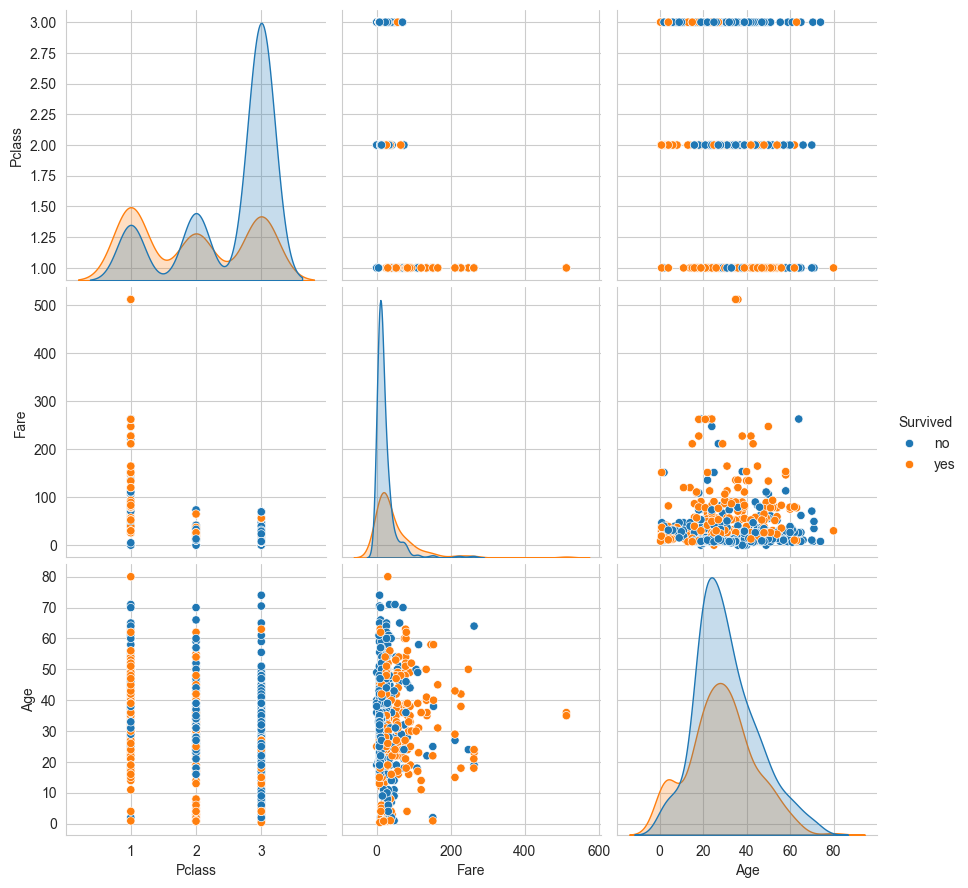

In [ ]:
# here we take only 4 features to  perform analysis.
sns.set_style("whitegrid");
sns.pairplot(data[["Survived","Pclass","Fare","Age"]], hue="Survived", size=3);
plt.show()

**Observations-**

* From the above grid of plots we can see that, passengers who paid higher fare or travelling in upper class has a higher chances to survive.
* Age is also giving some info like young persons have a higher chance to survive than old peoples.
* The picture is not very clear with pair plots so lets go towards uni-variate analysis to understand what exactly is happening.

**Uni-variate Analysis**

**1.Survived Feature**

<Axes: xlabel='count', ylabel='Survived'>

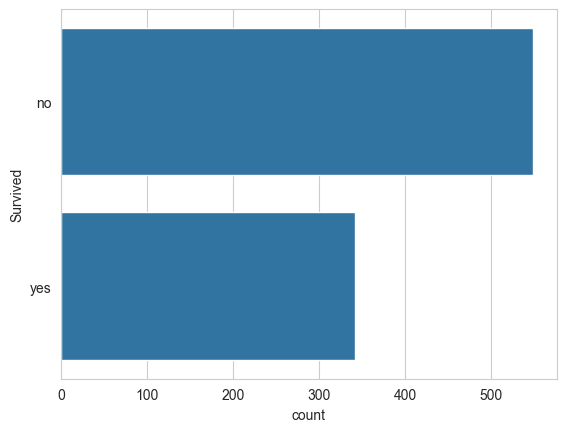

In [ ]:
# Countplot counts the each category of value and plot that.
sns.countplot(data["Survived"])

**Observations**:

* As we can see ‘no’ has the value > 500 means these people can’t survived in the disaster & approx 350 people survived. It is telling same story like we have seen above.

**2. Pclass- Feature**

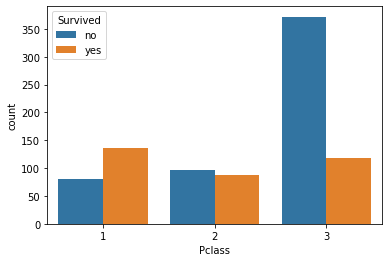

In [ ]:
sns.countplot(data["Pclass"],hue = data["Survived"],data = data)

**Observations**

* In above output plot we can see Persons who were travelling in 3rd class , mostly of them died or can not survived than other class passengers.
* Persons who were travelling in 2nd class, out of them almost equal number of people died and survived.
* Persons who were travelling in 1st class, out of them large number of people survived and also fair number of persons died.
* So as the conclusion we can say that person who were travelling in lower class like 3rd has higher chances to died. & persons who were travelling in higher class like 1st has higher chance to survive.

**3.Sex- Feature**

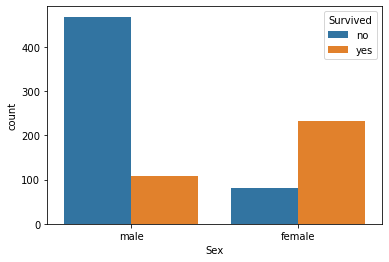

In [ ]:
sns.countplot(data["Sex"],hue = data["Survived"],data = data)

**Observations-**

* As we can see in above plot Out of all male passengers mostly of them died. And out of all Female passengers most of them survived.
* So as the conclusion we can say male passenger has higher chances to die and female passengers has higher chance to survive.Or Because of Ladies First policy , priorities were given to female passengers so the chances of survival for female passengers is increased than male passengers.

**4.Age-Feature-**

* Age feature consist some null values so first we need to handle that. Here i am filling the null values with median of Age Feature. we know that the median of Age feature is 28.
* Age is a numerical feature so we can’t plot a count plot for Age feature. we need to plot pdf for Age Feature.

**PdfS (Probability Density Functions):**

Pdfs stands for Probability Density Functions. In the context of data visualization, it usually refers to the probability distribution of a continuous random variable. In this case, the code seems to be plotting the probability density functions for the "Age" variable based on the "Survived" categories.

**FacetGrid:**

sns.FacetGrid is a Seaborn function that facilitates the creation of a grid of subplots based on the values of one or more categorical variables. It allows you to create multiple plots, each corresponding to a different category or combination of categories.
In this code, a FacetGrid is created based on the "Survived" variable, and the grid is used to visualize the distribution of the "Age" variable within each category. The hue="Survived" parameter indicates that the color of the plots will be based on the "Survived" category.
The size=5 parameter sets the size of each subplot in the grid.

**map(sns.distplot, "Age")**

The map function is used to apply a plotting function (sns.distplot in this case) to each subset of the data defined by the categories in the FacetGrid.
sns.distplot is a Seaborn function for plotting the distribution of a univariate set of observations. It combines a histogram with a kernel density estimate.
The variable "Age" is specified as the one-dimensional data to be plotted.

C:\Users\AC\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\AC\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


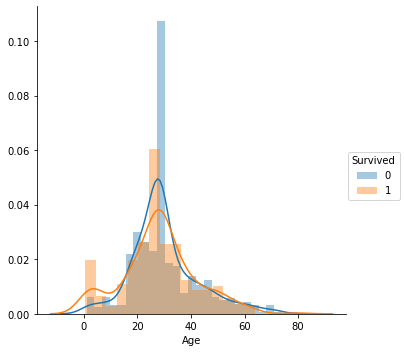

In [ ]:
# Filling null Values
data = data.fillna(28)

# plotting Pdfs
sns.FacetGrid(data, hue="Survived", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend()
plt.show()

**Observations-**

* Pdfs are almost overlapping on each other. so we can not conclude anything big clearly. but some of the conclusions are listed bellow.
* Passengers who have age <20 years so child's or teenagers , out of them numbers of passengers who survived is greater than numbers of people who died. Means while Rescuing priorities were given to child's or teenagers.
* Persons who have age >20 years and <45 years. Out of them numbers of passengers who died is greater than numbers of passengers who survived.
* Rest of the pdfs are overlapping much so we will not struggle here much to get some info. But people with age greater then 65 almost all of them died. it could be because of various reasons like people leave them on their luck or they died because of cold water of Atlantic Ocean of that time.. etc..

**5. Sibsp Feature**

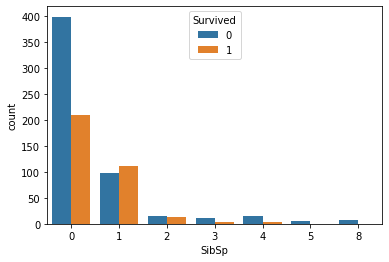

In [ ]:
sns.countplot(data["SibSp"],hue = data["Survived"],data = data)

**Observations**-


* Passengers who have 0 siblings mostly of them died.
* Passengers with 1 sibling has equally chance for both die and survive.
* passengers who have higher number of siblings like 3 , 4 , 5, 8 has a very low chance to survive or almost 0% chance to survive.

**6.Parch Feature**

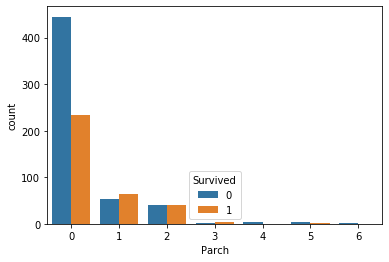

In [ ]:
sns.countplot(data["Parch"],hue = data["Survived"],data = data)

**Observations-**

* Like sibsp almost Same theory is applying here. Analyze it by yourself.

**7. Fare feature**

C:\Users\AC\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\AC\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


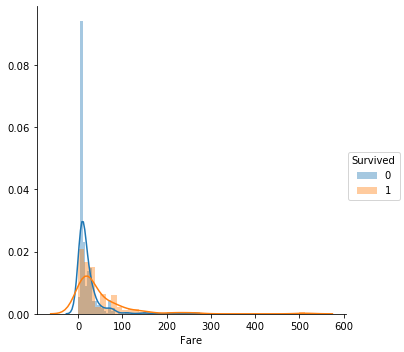

In [ ]:
sns.FacetGrid(data, hue="Survived", size=5) \
   .map(sns.distplot, "Fare") \
   .add_legend();
plt.show();

**Observations-**

* Passengers who paid low fair has a higher chances to die. On the other hand passengers who paid high fair has a higher chance to survive.This observation is same like pclass persons who were rich has higher chance to survive and poor lower chance to survive.

**8. Embarked Feature**

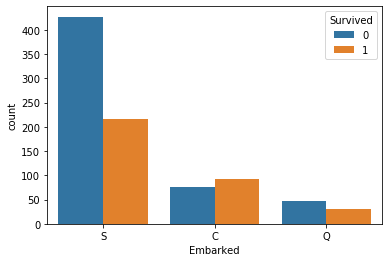

In [ ]:
sns.countplot(data["Embarked"],hue = data["Survived"],data = data)

**Observations-**

* Passengers who started his journey from Southampton , most of them died.
* There is not any much difference in peoples surviving or die chances who started his journey from Cherbourg , Queenstown .

**Some Important things here to know.**

* The Data set we have consists 12 features But we are doing uni-variate analysis only on 8 features because rest 4 features are useless os not give much information to us. for e.g feature PassengerId and Passenger name,tickets these to features are not useful for prediction so its better to drop theme from dataset. And in the cabin data set we have 77% null values so it is not trivial to handle cabin feature that’s why i am drooping these 4 features from my data set.

In [ ]:
# You can drop those 4 features from data set with this code.
data = data.drop(["PassengerId", "Name" , "Ticket" , "Cabin"],axis = 1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


* Now the question comes in mind is that do we need to perform uni-variate analysis on every individual feature of the data set. how can it possible to perform uni-variate analysis on all features individually if we have a large dimensional data set. Well i think ans is no , we don’t need to perform uni-variate analysis on individual feature in a large dimensional data set. That will be too costly and time taking. in that case you can perform bi-variate analysis or take a set of columns and train a model only on that set of features and see if that is giving good result then definitely those features are useful to predict class label else not.. like these you can try many hacks to analyze.